# Homework set 4

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 28, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

# About imports
Please import the needed packages by yourself.

# Sparse matrices
A _sparse matrix_ or _sparse array_ is a matrix in which most of the elements are zero. There is no strict definition how many elements need to be zero for a matrix to be considered sparse. In many examples, the number of nonzeros per row or column is a small fraction, a few percent or less, of the total number of elements of the row or column. By contrast, if most of the elements are nonzero, then the matrix is considered _dense_. 

In the context of software for scientific computing, a sparse matrix typically refers to a storage format, in which elements which are known to be zero are not stored. In Python, the library `scipy.sparse` defines several sparse matrix classes, such as `scipy.sparse.coo_matrix`. To construct such an object, one passes for each nonzero element the value, and the row and column coordinates. In some cases, one can also just pass the nonzero (off-)diagonals, see `scipy.sparse.diags`.

Functions for dense matrices do not always work with sparse matrices. For example for the product of a sparse matrix with a (dense) vector, there is the member function `scipy.sparse.coo_matrix.dot`, and for solving linear equations involving a sparse matrix, there is the function `scipy.sparse.linalg.spsolve`.

In [1]:
# Import some basic packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from scipy.sparse import coo_matrix

# This is how to create a sparse matrix from a given list of (row, column, value) tuples.
row  = [0,   3,   1,   0]
col  = [0,   3,   1,   2]
data = [4.0, 5.0, 7.0, 9.0]
M = coo_matrix((data, (row, col)), shape=(4, 4))

print("When printing a sparse matrix, it shows its nonzero entries:")
print(M)

print("If you want to see its `dense` matrix form, you have to use `mat.toarray()`:")
print(M.toarray())

# This is how to perform matrix-vector products.
x = np.array([1, 2, 3, 4])
print("For x={}, Mx = {}".format(x, M.dot(x)))

When printing a sparse matrix, it shows its nonzero entries:
  (0, 0)	4.0
  (3, 3)	5.0
  (1, 1)	7.0
  (0, 2)	9.0
If you want to see its `dense` matrix form, you have to use `mat.toarray()`:
[[4. 0. 9. 0.]
 [0. 7. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 5.]]
For x=[1 2 3 4], Mx = [31. 14.  0. 20.]


This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.
[[1. 1. 1. 0.]
 [0. 2. 2. 2.]
 [0. 0. 3. 3.]
 [0. 0. 0. 4.]]
This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.
[[1. 0. 0. 0.]
 [1. 2. 0. 0.]
 [1. 2. 3. 0.]
 [0. 2. 3. 4.]]
If you want to visualize the matrix for yourself, use `plt.imshow`:


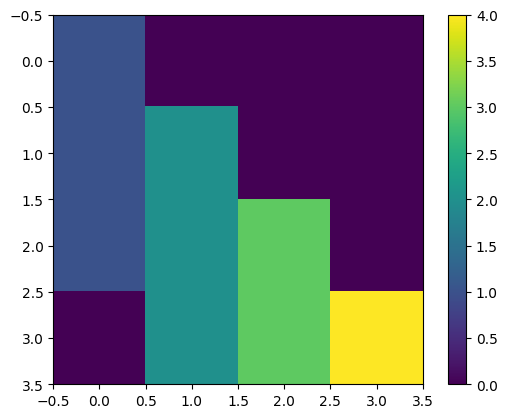

For b=[1 2 3 4], the solution x to Mx=b is [1.         0.5        0.33333333 0.5       ]
And indeed, Mx - b = [0. 0. 0. 0.]


In [3]:
from scipy.sparse import diags, SparseEfficiencyWarning
from scipy.sparse.linalg import spsolve
import warnings
warnings.simplefilter('ignore', SparseEfficiencyWarning)  # Suppress confusing warning

# This is how to create a sparse matrix from a given list of subdiagonals.
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
M = diags(diagonals, [0, 1, 2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.")
print(M.toarray())

M = diags(diagonals, [0, -1, -2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.")
print(M.toarray())

print("If you want to visualize the matrix for yourself, use `plt.imshow`:")
plt.imshow(M.toarray())
plt.colorbar()
plt.show()

# This is how to solve sparse systems.
b = np.array([1, 2, 3, 4])
x = spsolve(M, b)
print("For b={}, the solution x to Mx=b is {}".format(b, x))
print("And indeed, Mx - b = {}".format(M.dot(x) - b))

--------
# Exercise 1
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$ \tag{1} y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

The purpose of this exercise is to approximate the solution to this boundary value problem, by discretizing the problem and then solving the resulting system of nonlinear equations. 

Problem (1) will be discretized using finite differences. Suppose we use $n+2$ discretization points for $x$, denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$. The approximate solution is denoted $y_k = y(x_k)$. 

We will use a _second-order central finite difference_ approximation for the second derivative: 

$$ \tag{2} y''(x_k) \approx \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2}.$$

The term $\exp(y(x_k))$ can simply be approximated by $\exp(y_k)$. Thus for $x=x_k$, equation (1) becomes

$$ \tag{3} \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

The boundary conditions (the conditions $y(0) = y(1) = 1$), lead to the requirement that $y_0 = y_{n+1} = 0$. To find the remaining values $y_k$, $k=1, \ldots, n$, equation (3) will be used for $k = 1, \ldots, n$. In this way, one obtains $n$ equations for $n$ unknowns, to which, in principle, a rootfinding method can be applied.

We will write $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ for the vector of values to be determined. 


## (a)  (2 pts)
As a first step, finish the function `SecondDerMatrix` that returns a matrix $\bf{M}$ that maps the vector $\vec y$ to the vector of the approximate values $y''(x_k)$, $k=1, \ldots, n$ given in (2). To get full points for this part of the exercise you must create output in the form of a sparse matrix.

In [4]:
from scipy.sparse import coo_matrix

# Hessian Matrix
def SecondDerMatrix(y, n): 
    # calculate h and h^2
    h = 1 / (n + 1)
    h2 = h * h

    # init lists needed to create sparse matrix
    row, col, data = [], [], []
    
    # loop over solutions of equations
    for k in range(n):
        # calculate approximation for second derivatives (check if first or last element of y)
        if k == 0:
            y_prime2 = (0 - 2*y[k][0] + y[k+1][0]) / h2
        elif k == n-1:
            y_prime2 = (y[k-1][0] - 2*y[k][0] + 0) / h2
        else:
            y_prime2 = (y[k-1][0] - 2*y[k][0] + y[k+1][0]) / h2

        # save data for creation of sparse matrix
        data.append(y_prime2)
        row.append(k)
        col.append(k)
    
    # create sparse Hessian matrix
    M = coo_matrix((data, (row, col)), shape=(n, n))
    return M

n = 4
y = np.zeros([n,1])
print("For y={} the Hessian (Second Derivative Matrix M) is:\n".format(y.reshape(1, n)))
print("Sparse Matrix Form:\n{}".format(SecondDerMatrix(y, n)))
print("\nDense Matrix Form:\n{}".format(SecondDerMatrix(y, n).toarray()))

For y=[[0. 0. 0. 0.]] the Hessian (Second Derivative Matrix M) is:

Sparse Matrix Form:
  (0, 0)	0.0
  (1, 1)	0.0
  (2, 2)	0.0
  (3, 3)	0.0

Dense Matrix Form:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## (b)  (1 pt)
Second-order central finite differences are exact for quadratic functions. In order to test your implementation, choose $n=10$ and apply the second derivative matrix from part (a) to a quadratic function $y(x)$ with $y(0) = y(1) = 0$ for which you know the second derivative $y''(x)$.

In [6]:
# Chosen quadratic function where x=0/x=1 equal to 0: y(x)=2x^2 - 2x
# Its second order derivative: y"(x)=4

n = 10
# create an array of equally spaced numbers between 0 and 1
X = np.linspace(0, 1, num=n+2)[1:-1] # remove 0 and 1 from list

y = np.zeros([n,1])
for i, x in enumerate(X):
    eq = 2*x**2 - 2*x
    y[i][0] = eq

print("For x={} (of length {})".format(X, len(X)))
print("\nAs input for y(x)=2x^2 - 2x returns:")
print("y={} (of length {})".format(y.reshape(1, n), len(y)))
print("\nThe Second Derivative (Sparse) Matrix of this y is:\n{}".format(SecondDerMatrix(y, n)))

For x=[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455
 0.63636364 0.72727273 0.81818182 0.90909091] (of length 10)

As input for y(x)=2x^2 - 2x returns:
y=[[-0.16528926 -0.29752066 -0.39669421 -0.46280992 -0.49586777 -0.49586777
  -0.46280992 -0.39669421 -0.29752066 -0.16528926]] (of length 10)

The Second Derivative (Sparse) Matrix of this y is:
  (0, 0)	4.0
  (1, 1)	4.0
  (2, 2)	4.0
  (3, 3)	4.0
  (4, 4)	4.0
  (5, 5)	4.0
  (6, 6)	4.0
  (7, 7)	4.000000000000013
  (8, 8)	3.9999999999999867
  (9, 9)	3.9999999999999867


**Answer:**

For the chosen quadratic function where $x=0$ and $x=1$ is equal to $0$: $y(x)=2x^2 - 2x$, the second derivative is $y''(x)=4$.

Our implementation for the second derivative matrix returns the correct second derivatives for this function. Thus we assume our implementation is correct.

## (c) (2 pts)

Defining $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ and 
$E(\vec y) = \begin{bmatrix} \exp(y_1) \\ \vdots \\ \exp(y_n) \end{bmatrix}$, the equations (3) can be written in the form

$$ F(\vec y) := {\bf M} \cdot \vec y + E(\vec y) = \vec 0. $$

Finish the function `F` that defines $F(\vec y) = {\bf M} \cdot \vec y + E(\vec y)$.
Finish the function `JacobianF` that computes the Jacobian ${\bf J}_F(\vec y)$ of $F(\vec y)$.
To get full points for this part of the exercise, the Jacobian must be computed in the form of a sparse matrix.

In [8]:
def F(y):
    n = len(y)
    # obtain Hessian
    M = SecondDerMatrix(y, n)
    
    # calculate F(y) = My + E(y)
    Fy = M.dot(y) + np.exp(y) 
    return Fy
    
def JacobianF(y):
    n = len(y)
    # calculate h and h^2
    h = 1 / (n + 1)
    h2 = h * h

    # init lists needed to create diagonal sparse matrix
    diagonals = [[],[],[]]
    for i in range(n):
        for j in range(n):
            # if diagonal of J (append partial derivative of yi)
            if i == j:
                diagonals[0].append(-2.0 / h2 + np.exp(y[i][0]))
            # if one above diagonal of J (append partial derivative of yi+1)
            elif i == j + 1:
                diagonals[1].append(1.0 / h2)
            # if one below diagonal of J (append partial derivative of yi-1)
            elif i == j - 1:
                diagonals[2].append(1.0 / h2)

    # create sparse (off)diagonal matrix
    JFy = diags(diagonals, [0, 1, -1])
    return JFy

print("For y={}\n".format(y.reshape(1,n)))
print("F(y)={}\n".format(F(y).reshape(1,n)))
print("JF(y)=     (Sparse Form)\n{}".format(JacobianF(y)))

For y=[[-0.16528926 -0.29752066 -0.39669421 -0.46280992 -0.49586777 -0.49586777
  -0.46280992 -0.39669421 -0.29752066 -0.16528926]]

F(y)=[[ 0.18649146 -0.44742541 -0.91423721 -1.22172739 -1.3744289  -1.3744289
  -1.22172739 -0.91423721 -0.44742541  0.18649146]]

JF(y)=     (Sparse Form)
  (0, 0)	-241.15235151895368
  (1, 1)	-241.25734276109557
  (2, 2)	-241.32746035318763
  (3, 3)	-241.3704877195046
  (4, 4)	-241.39095782974962
  (5, 5)	-241.39095782974962
  (6, 6)	-241.3704877195046
  (7, 7)	-241.32746035318763
  (8, 8)	-241.25734276109557
  (9, 9)	-241.15235151895368
  (0, 1)	121.0
  (1, 2)	121.0
  (2, 3)	121.0
  (3, 4)	121.0
  (4, 5)	121.0
  (5, 6)	121.0
  (6, 7)	121.0
  (7, 8)	121.0
  (8, 9)	121.0
  (1, 0)	121.0
  (2, 1)	121.0
  (3, 2)	121.0
  (4, 3)	121.0
  (5, 4)	121.0
  (6, 5)	121.0
  (7, 6)	121.0
  (8, 7)	121.0
  (9, 8)	121.0


## (d)  (3 pts)
1. Write down the first order Taylor expansion $T_F(\vec y, \vec s)$ for $F(\vec y+\vec s)$.
2. In order to check your implementation of the Jacobian matrix, compute and print both $F(\vec y+\vec s)$ and its first order Taylor approximation $T_F(\vec y, \vec s)$ for a choice $\vec y$ and $\vec s$.
3. Verify numerically that the error $||F(\vec y + \vec s) - T_F(\vec y, \vec s)||_2$ is $\mathcal O(||\vec s||_2^2)$. Hint: take vectors $\vec s$ with $\|\vec s\|_2 = \mathcal O(h)$  for multiple values for $h$, e.g. $h = 10^{-k}$ for a range of $k$. 

Subquestion 1.

YOUR ANSWER HERE

In [9]:
# Subquestions 2 and 3.

# YOUR CODE HERE


## (e) (2 pts)
1. Finish the function `NewtonSolve` below to solve the system of equations.
2. Take $n=40$, and experiment with your function. Try to find a choice of `y0` such that the method doesn't converge, as well as a choice of `y0` such that the method converges. In your answer, list the types of convergence behavior you found. Show a convergent example (if you found any) and a nonconvergent example (if you found any). Show the solutions you found for each example.

In [10]:
# Subquestion 1.
def NewtonSolve(y0, K): 
    """ Use Newton's method to solve F(y) = 0 with initial guess y0 and K iterations. """
    # initial guess
    y = y0
    n = len(y0)

    for k in range(K):
        # determine Fy and JFy for current solution
        Fy = F(y)
        JFy = JacobianF(y)

        # compute Newton step
        s = spsolve(JFy, -Fy).reshape(n, 1)

        # update solution
        y = y + s

    return y

n = 40
y0 = np.zeros([n,1])
K = 50
y = NewtonSolve(y0, K)
print("With our initial guess:\ny0={}\n".format(y0.reshape(1,n)))
print("After {} iterations our NewtonSolve implementation came up with this solution:\ny={}\n".format(K, y.reshape(1,n)))
print("If you use our found solution as an input for F(y) you obtain:\nF(y)={}\n".format(F(y).reshape(1,n)))
print("This is close to being a zero-vector, thus we assume our implementation is correct.")


With our initial guess:
y0=[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

After 50 iterations our NewtonSolve implementation came up with this solution:
y=[[0.06088897 0.11174175 0.15663807 0.19708849 0.23386121 0.26741905
  0.29806978 0.32603131 0.35146464 0.37449236 0.39520983 0.41369235
  0.42999995 0.44418074 0.45627321 0.46630799 0.47430905 0.48029465
  0.48427795 0.4862675  0.4862675  0.48427795 0.48029465 0.47430905
  0.46630799 0.45627321 0.44418074 0.42999995 0.41369235 0.39520983
  0.37449236 0.35146464 0.32603131 0.29806978 0.26741905 0.23386121
  0.19708849 0.15663807 0.11174175 0.06088897]]

If you use our found solution as an input for F(y) you obtain:
F(y)=[[ 3.55321369e-02 -6.23581634e-04 -1.06954872e-03 -5.96907474e-04
  -3.62905478e-04 -2.47380556e-04 -1.83242889e-04 -1.43943040e-04
  -1.18088012e-04 -1.00187365e-04 -8.73243836e-05 -7.78286497e-05
  -7.06866076e-05 -6.52551833e-05 -6.11122

For an initial guess of a 40x1 vector of ones: 
y0=[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

Our NewtonSolve implementation comes up with a solution close to the previously seen solution when our initial guess is a vector of all zeros and we run our solver for 50 iterations: 
y=[[0.04314546 0.08394449 0.12242811 0.15862528 0.19256296 0.22426611
  0.25375778 0.28105914 0.30618955 0.32916661 0.3500062  0.36872257
  0.38532838 0.39983473 0.41225123 0.42258604 0.43084588 0.43703612
  0.44116074 0.44322239 0.44322239 0.44116074 0.43703612 0.43084588
  0.42258604 0.41225123 0.39983473 0.38532838 0.36872257 0.3500062
  0.32916661 0.30618955 0.28105914 0.25375778 0.22426611 0.19256296
  0.15862528 0.12242811 0.08394449 0.04314546]]



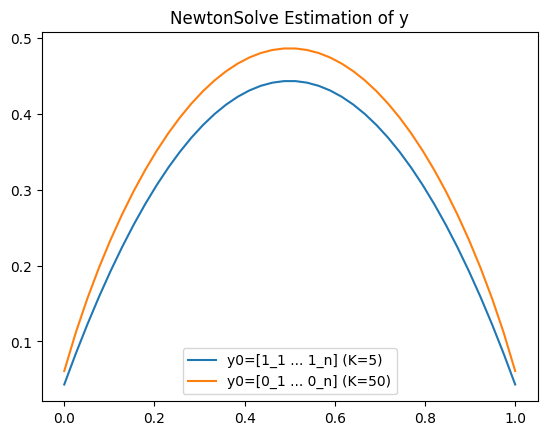

When our initial guess is a randomly generated vector: 
y0=[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
  0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
  0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
  0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
  0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]]

NewtonSolve returns a solution of: 
y=[[-1.34677547e+23 -2.69354330e+23 -4.04033464e+23 -5.38698531e+23
  -6.73497528e+23 -8.07156047e+23 -9.41221037e+23 -1.06604032e+24
  -1.19260915e+24 -1.31483769e+24 -1.44373685e+24 -1.49506369e+24
  -1.54529682e+24 -1.59753788e+24 -1.61717207e+24 -1.63324544e+24
  -1.64049430e+24 -1.64055166e+24 -1.64891981e+24 -1.65684996e+24
  -1.63748360e+24 -1.63810335e+24 -1.59647730e+24 -1.55675681e+24
  -1.51441385e+24 -1.46215406e+24 -1.41826221e+24 

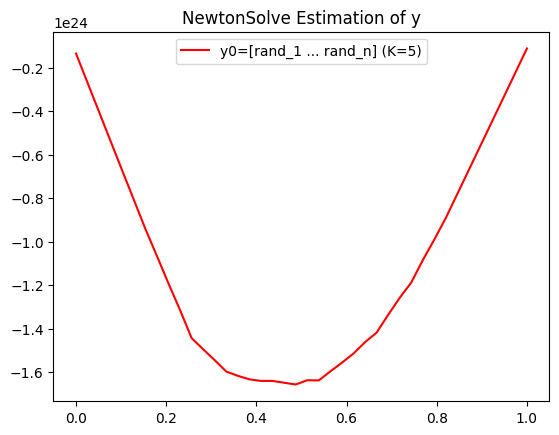

After some more iterations (K=10) the solution for the randomly generated vector becomes: 
y=[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan]]


/opt/homebrew/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:230: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


In [11]:
# Subquestion 2, code part
n = 40
K = 5

# initial guess that converges;
conv_y0 = np.ones([n,1])
# and one that doesn't
np.random.seed(42)
noConv_y0 = np.random.rand(n,1)

results = []
for y0 in [conv_y0, noConv_y0]:
    results.append(NewtonSolve(y0, K))

print("For an initial guess of a {}x1 vector of ones: \ny0={}\n".format(n,conv_y0.reshape(1,n)))
print("Our NewtonSolve implementation comes up with a solution close to the previously seen solution when our initial guess is a vector of all zeros and we run our solver for 50 iterations: \ny={}\n".format(results[0].reshape(1,n)))
plt.plot(np.linspace(0,1,n), results[0], label="y0=[1_1 ... 1_n] (K=5)")
plt.plot(np.linspace(0,1,n), y, label="y0=[0_1 ... 0_n] (K=50)")
plt.title("NewtonSolve Estimation of y")
plt.legend()
plt.show()
print("When our initial guess is a randomly generated vector: \ny0={}\n".format(noConv_y0.reshape(1,n)))
print("NewtonSolve returns a solution of: \ny={}".format(results[1].reshape(1,n)))
plt.plot(np.linspace(0,1,n), results[1], label="y0=[rand_1 ... rand_n] (K=5)", c='red')
plt.title("NewtonSolve Estimation of y")
plt.legend()
plt.show()
print("After some more iterations (K={}) the solution for the randomly generated vector becomes: \ny={}".format(10, NewtonSolve(noConv_y0, 10).reshape(1,n)))

**Answer**

When our initial guess is a $n \times 1$ vector of all all ones or zeros, our `NewtonSolve` implementation converges to the same solution when the amount of iterations of the algortihm is the same. The solution it converges to can be seen in in the two cells above. 

In the cell above we can also see that when our initial guess is a $n \times 1$ vector containing randomly generated numbers (between 0 and 1) rather stange behavior occurs. Here, we can see that if we run our `NewtonSolve` for $K=5$ iterations the solution converges to an exteremely large negative value. When we run the solver for double the amount of iterations, namely $K=10$, our solution becomes a vector of all "nan" values. This is probably due to the Jaccobian becoming singular when the solution becomes so (negatively) large that it can't be represented by the floating point system. And when the Jacobian becomes singular, we cannot solve $J_F(y)=-F(y)$ anymore. 